# Assignment - Decision Tree

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
# print(os.getcwd())

In [2]:
df = pd.read_csv("ExData\car_data.csv")
df.set_index(["User ID"], inplace=True)
df = pd.concat([df, pd.get_dummies(df['Gender'],dtype=int)], axis=1)
df.head(10)

,Gender,Age,AnnualSalary,Purchased,Female,Male
User ID,,,,,,
385,Male,35,20000,0,0,1
681,Male,40,43500,0,0,1
353,Male,49,74000,0,0,1
895,Male,40,107500,1,0,1
661,Male,25,79000,0,0,1
846,Female,47,33500,1,1,0
219,Female,46,132500,1,1,0
588,Male,42,64000,0,0,1
85,Female,30,84500,0,1,0


## Question 1

Add Age to the model, how does the performance improve? 

1. Create a classifier model named clf
2. Train the classifier using .fit() and passing Age and AnnualSalary to the model.
3. Print the confusion matrix, compare the results to your model and notes from class.

In [3]:
X = df[['Age', 'AnnualSalary']]
y = df['Purchased']
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [4]:
confusion_matrix(y, clf.predict(X))

array([[598,   0],
       [  9, 393]], dtype=int64)

In [5]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       598
           1       1.00      0.98      0.99       402

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



## Question 2

Is the model overfitting? Test using test-train split.

1. Split the data using train_test_split() function with `test_size=0.25` and `random_state=42`
2. Create a new DecisionTreeClassifier() named clf1
3. Train the classifier on the training dataset.
4. Print the classification report for the train and test data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'AnnualSalary']], df['Purchased'],
                                                    test_size=0.25, random_state=42)

In [7]:
clf1 = tree.DecisionTreeClassifier()
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
print(classification_report(y_train, clf1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       460
           1       1.00      0.98      0.99       290

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



In [9]:
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       138
           1       0.87      0.81      0.84       112

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



## Question 3

Can the performance be improved by pruning the tree? Use cost complexity path to find the alpha that maximizes accuracy on unseen data.

1. Create a DecisionTreeClassifier named clf2.
2. Split the data using train_test_split() function with `test_size=0.25` and `random_state=42`
3. Using the .cost_complexity_pruning_path() method, create a variable name path using the X_train and y_train data.
4. Extract the ccp_alphas and impurities from the path variable.
5. Train a set of classifiers for the different values of ccp_alpha.
   - Remember to initialize an empty list before the for loop
   - Remember to train only on the training dataset
6. Plot the Accuracy vs Alpha for the in-sample (training) and out-of-sample (test).
7. Select the "best" value for ccp_alpha and train a new classifier model named clf3.
8. Print the classification report for the training data and test data.

In [8]:
clf2 = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'AnnualSalary']], df['Purchased'],
                                                    test_size=0.25, random_state=42)

path = clf2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [9]:
len(ccp_alphas)

38

In [10]:
#train models on different values of ccp_alpha and store them in a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

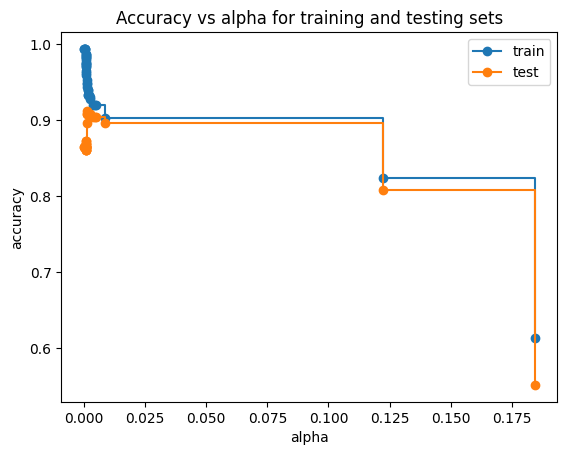

In [11]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [12]:
print("Max accuracy", max(test_scores))
test_scores.index(max(test_scores)) #the index of the clf model with highest accuracy score

Max accuracy 0.912


23

In [13]:
clf3 = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[23])
clf3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0012839506172839501, random_state=0)

In [14]:
print(classification_report(y_train, clf3.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       460
           1       0.95      0.91      0.93       290

    accuracy                           0.95       750
   macro avg       0.95      0.94      0.94       750
weighted avg       0.95      0.95      0.95       750



In [15]:
print(classification_report(y_test, clf3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       138
           1       0.94      0.86      0.90       112

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

